In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

from  dataset import load_dataset, train_dev_split, prep_dataset


## Using Custom Prepared Dataset

In [2]:
dataset_size_in_per = 100

train_x_orig, train_y_orig, test_x_orig, test_y_orig = load_dataset(dataset = "mnist", size_in_per = dataset_size_in_per)


In [3]:
train_x_split, train_y_split, dev_x_split, dev_y_split = train_dev_split(train_x_orig, train_y_orig)


In [4]:
train_x_norm, train_y_encoded = prep_dataset(train_x_split, train_y_split, num_class = 10)
dev_x_norm, dev_y_encoded= prep_dataset(dev_x_split, dev_y_split, num_class = 10)
test_x_norm, test_y_encoded = prep_dataset(test_x_orig, test_y_orig, num_class = 10)

print("Data\t\t\t","Before Processing\t","After Processing")
print("=================================================================")
print("Training Set Images:\t" + str(train_x_split.shape)+"\t\t"+ str(train_x_norm.shape))
print("Training Set Labels:\t" + str(train_y_split.shape)+"\t\t"+ str(train_y_encoded.shape))
print("Dev Set Images:\t\t" + str(dev_x_split.shape)+"\t\t"+ str(dev_x_norm.shape))
print("Dev Set Labels:\t\t" + str(dev_y_split.shape)+"\t\t"+ str(dev_y_encoded.shape))
print("Test Set Images:\t" + str(test_x_orig.shape)+"\t\t"+ str(test_x_norm.shape))
print("Test Set Labels:\t" + str(test_y_orig.shape)+"\t\t"+ str(test_y_encoded.shape))
print("=================================================================")



Data			 Before Processing	 After Processing
Training Set Images:	(50000, 28, 28)		(784, 50000)
Training Set Labels:	(50000, 1)		(10, 50000)
Dev Set Images:		(10000, 28, 28)		(784, 10000)
Dev Set Labels:		(10000, 1)		(10, 10000)
Test Set Images:	(10000, 28, 28)		(784, 10000)
Test Set Labels:	(10000, 1)		(10, 10000)


In [6]:
model1 = keras.Sequential([
    keras.Input(shape = (784,)),
    layers.Dense(120, activation = 'relu', name = 'HiddenLayer1'),
    layers.Dropout(0.1),
    layers.Dense(10, activation = 'softmax', name = 'OutputLayer')
       
])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer1 (Dense)         (None, 120)               94200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
OutputLayer (Dense)          (None, 10)                1210      
Total params: 95,410
Trainable params: 95,410
Non-trainable params: 0
_________________________________________________________________


In [8]:
model1.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = keras.optimizers.Adam(learning_rate = 0.01485),
              metrics = ["accuracy"],

)

In [9]:
history1 = model1.fit(
    train_x_norm.T,
    train_y_split,
    batch_size = 100,
    epochs=5,
    validation_data = (dev_x_norm.T, dev_y_split)
)

Epoch 1/5
500/500 [==============================] - 5s 10ms/step - loss: 1.6461 - accuracy: 0.8149 - val_loss: 1.6173 - val_accuracy: 0.8427
Epoch 2/5
500/500 [==============================] - 4s 8ms/step - loss: 1.5538 - accuracy: 0.9067 - val_loss: 1.5281 - val_accuracy: 0.9323
Epoch 3/5
500/500 [==============================] - 5s 10ms/step - loss: 1.5409 - accuracy: 0.9198 - val_loss: 1.5305 - val_accuracy: 0.9307
Epoch 4/5
500/500 [==============================] - 5s 10ms/step - loss: 1.5357 - accuracy: 0.9251 - val_loss: 1.5235 - val_accuracy: 0.9371
Epoch 5/5
500/500 [==============================] - 5s 10ms/step - loss: 1.5250 - accuracy: 0.9360 - val_loss: 1.5320 - val_accuracy: 0.9291


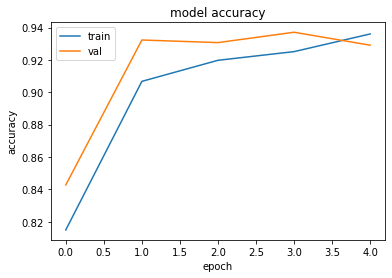

In [10]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


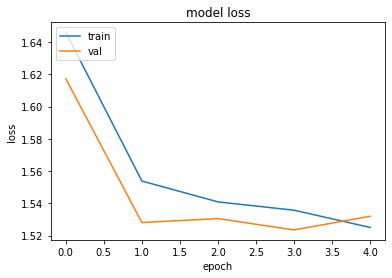

In [11]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


## Using Keras  dataset

In [12]:
np.random.seed(1)
tf.random.set_seed(1)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [13]:
# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

print(x_val.shape,x_train.shape)

(10000, 784) (50000, 784)


In [14]:
model = keras.Sequential([
    layers.Flatten(input_shape = (784,), name = 'InputLayer'),
    layers.Dense(120, activation = 'relu', name = 'HiddenLayer2'),
    layers.Dropout(0.1),
    layers.Dense(10, activation = 'softmax', name = 'OutputLayer')
       
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 120)               94200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 120)               0         
_________________________________________________________________
OutputLayer (Dense)          (None, 10)                1210      
Total params: 95,410
Trainable params: 95,410
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = keras.optimizers.Adam(learning_rate = 0.01485),
              metrics = ["accuracy"]

)

In [16]:
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=100,
    epochs=5,
    validation_data=(x_val, y_val),verbose = 1
)

Fit model on training data
Epoch 1/5
500/500 [==============================] - 8s 16ms/step - loss: 1.6876 - accuracy: 0.7733 - val_loss: 1.6168 - val_accuracy: 0.8437
Epoch 2/5
500/500 [==============================] - 6s 11ms/step - loss: 1.6281 - accuracy: 0.8328 - val_loss: 1.6087 - val_accuracy: 0.8522
Epoch 3/5
500/500 [==============================] - 7s 14ms/step - loss: 1.6268 - accuracy: 0.8339 - val_loss: 1.6058 - val_accuracy: 0.8549
Epoch 4/5
500/500 [==============================] - 5s 10ms/step - loss: 1.6265 - accuracy: 0.8344 - val_loss: 1.6107 - val_accuracy: 0.8501
Epoch 5/5
500/500 [==============================] - 6s 13ms/step - loss: 1.6221 - accuracy: 0.8389 - val_loss: 1.6116 - val_accuracy: 0.8493


In [17]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
79/79 [==============================] - 0s 5ms/step - loss: 1.6171 - accuracy: 0.8436
test loss, test acc: [1.6171411275863647, 0.8435999751091003]
Generate predictions for 3 samples
predictions shape: (3, 10)


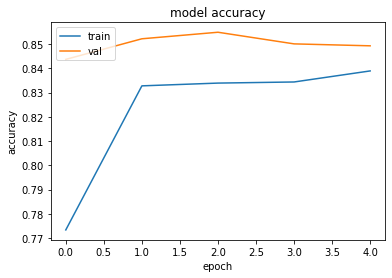

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


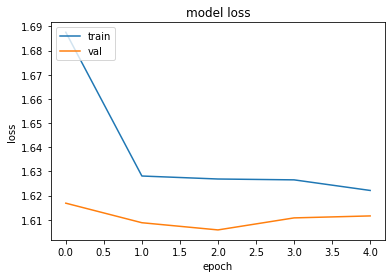

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
